# Model fitting

In [39]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


In [40]:
test_SEDs

['/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/jetset-1.1.0a3-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/jetset-1.1.0a3-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.ecsv',
 '/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/jetset-1.1.0a3-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk501.ecsv']

## loading data



In [41]:
print(test_SEDs[1])
data=Data.from_file(test_SEDs[1])


/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/jetset-1.1.0a3-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.ecsv



***  binning data  ***
---> N bins= 89
---> bin_widht= 0.2



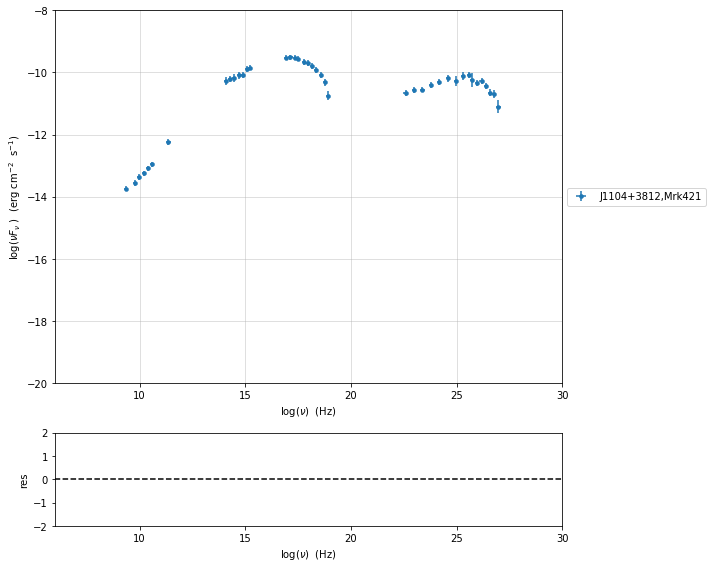

In [42]:
%matplotlib inline
sed_data=ObsData(data_table=data)
sed_data.group_data(bin_width=0.2)

sed_data.add_systematics(0.1,[10.**6,10.**29])
p=sed_data.plot_sed()

## phenomenological model constraining

### spectral indices


*** evaluating spectral indices for data ***
---> initial range for index radio  set to [6.000000,10.000000]
---> range for index radio updated  to [6.000000,10.000000]
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.402754e+00, err=1.250721e-01 

---> initial range for index radio_mm  set to [10.000000,11.000000]
---> range for index radio_mm updated  to [10.000000,11.000000]
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-1.290348e+00, err=3.549105e-02 

---> initial range for index mm_IR  set to [11.000000,13.000000]
---> range for index mm_IR updated  to [10.300000,13.700000]
---> name = mm_IR            range=[10.300,13.700] log(Hz)  photon.val=-1.109667e+00, err=5.233777e-02 

---> initial range for index IR_Opt  set to [13.000000,14.000000]
---> range for index IR_Opt updated  to [12.500000,14.500000]
---> name = IR_Opt           range=[12.500,14.500] log(Hz)  photon.val=-1.778730e+00, err=8.336743e-02 

---> initial range for i

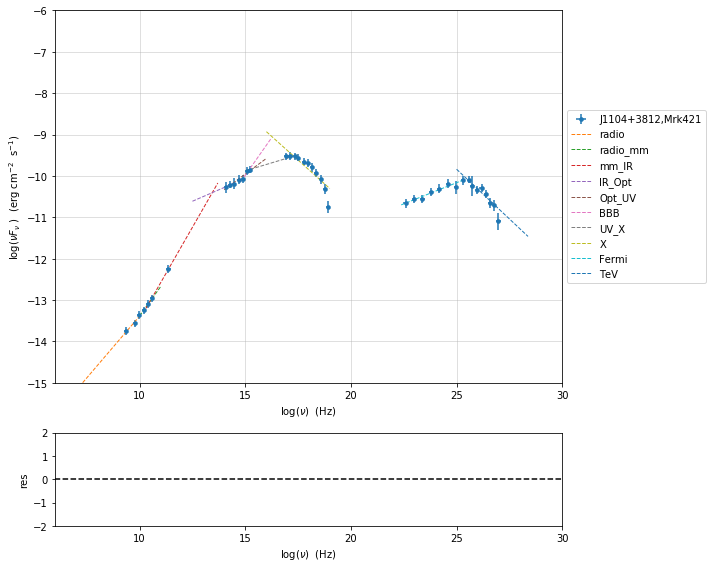

In [43]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

### sed shaper

In [44]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=False,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10,21])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
name   par type       units      val  phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- ----- ---------------- ---------------- ----- ------
   b    curvature                -1.0            -10.0              0.0 False  False
   c third-degree                -1.0            -10.0             10.0 False  False
  Ep    peak freq            Hz  14.0              0.0             30.0  True  False
  Sp    peak flux erg / (cm2 s) -10.0            -30.0              0.0  True  False
---> class:  HSP

name   par type       units             val          phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- -------------------- ---------------- ---------------- ----- ------
   b    curvature                -0.1616711597370628            -10.0              0.0 False  False
   c third-degree               -0.01128616942779459            

In [45]:
best_fit.show_report()


**************************************************************************************************
Fit report

Model: sync-shape-fit
name   par type       units             val          phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- -------------------- ---------------- ---------------- ----- ------
   b    curvature                -0.1616711597370628            -10.0              0.0 False  False
   c third-degree               -0.01128616942779459            -10.0             10.0 False  False
  Ep    peak freq            Hz   16.699546506140955              0.0             30.0  True  False
  Sp    peak flux erg / (cm2 s)   -9.480534718029283            -30.0              0.0  True  False

converged=True
calls=28
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
dof=18
chisq=13.284583, chisq/red=0.738032 null hypothesis sig=0.774397

best fit pars
name     bestfit val             err +         err -     start 


*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-fit
name   par type       units              val          phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- --------------------- ---------------- ---------------- ----- ------
   b    curvature                 -0.2089420614350601            -10.0              0.0 False  False
   c third-degree               -0.048931770957487686            -10.0             10.0 False  False
  Ep    peak freq            Hz     25.26030713913833              0.0             30.0  True  False
  Sp    peak flux erg / (cm2 s)    -10.12033322780453            -30.0              0.0  True  False

converged=True
calls=180
------------------------------------------------------------------
| FCN = 3.125                   |     Ncalls=179 (179 total)     |
| EDM =

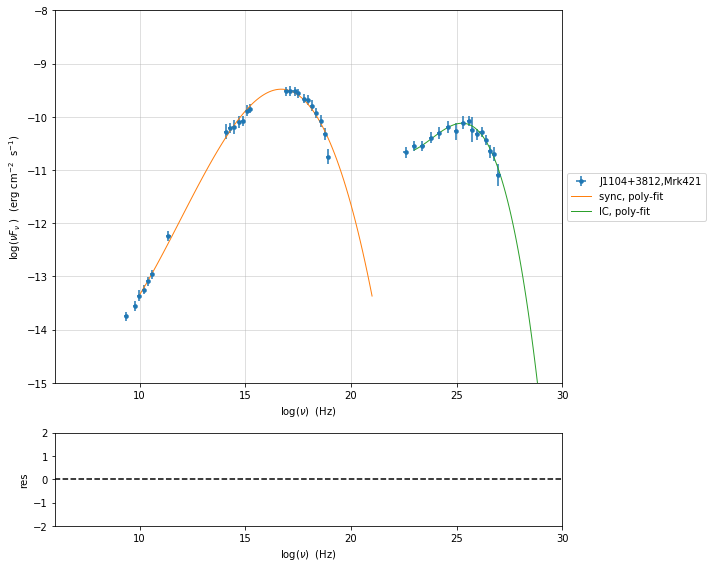

In [46]:
my_shape.IC_fit(fit_range=[23,29],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15)

### model constraining

In [47]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E12,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False)
prefit_jet.save_model('prefit_jet.dat')


***  constrains parameters from observable ***

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3              100.0              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       100000000

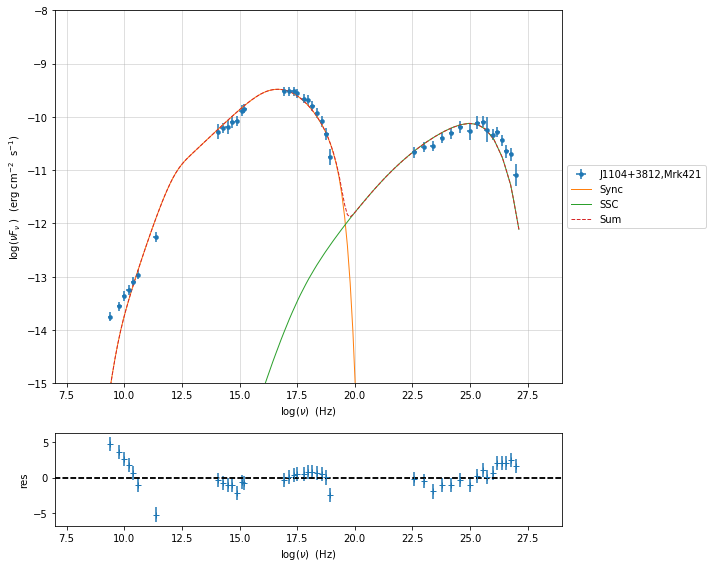

In [48]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

## Model fitting

### Model fitting with LSB

In [49]:
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet

jet_lsb=Jet.load_model('prefit_jet.dat')
jet_lsb.set_gamma_grid_size(200)

fit_model_lsb=FitModel( jet=jet_lsb, name='SSC-best-fit-lsb',template=None) 
fit_model_lsb.freeze('z_cosm')
fit_model_lsb.freeze('R_H')
fit_model_lsb.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_minuit.parameters.beam_obj.fit_range=[5,50]

model_minimizer_lsb,best_fit_lsb=fit_SED(fit_model_lsb,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-lsb',minimizer='lsb')


      name             par type           units               val           phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ---------------------- ---------------- ------------------ ----- ------
               R         region_size              cm 1.7128239342442284e+16              0.0              1e+30 False  False
             R_H     region_position              cm                  1e+17              0.0               None False   True
               B      magnetic_field               G                    0.1              0.0               None False  False
        beam_obj             beaming Lorentz-factor*                   25.0           0.0001               None False  False
          z_cosm            redshift                                 0.0308              0.0               None False  False
               N    electron_density         1 / cm3       2.83092128807034              0.0               None False  False


In [50]:
best_fit_lsb.save_report()
best_fit_lsb.bestfit_table

name,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str16,object,object,object,float64,float64,object,bool
R,1.580676114888804e+16,4.213973668814037e+16,None,1.7128239342442284e+16,3162277660168379.5,3.1622776601683795e+17,False
R_H,None,None,None,1e+17,0.0,None,True
B,0.06442935026727215,0.05550334583430855,None,0.1,0.0,None,False
beam_obj,30.049043647577427,31.830048535690334,None,25.0,0.0001,None,False
z_cosm,None,None,None,0.0308,0.0,None,True
N,2.0951741090032256,6.636430740311617,None,2.83092128807034,0.0,None,False
gmin,334.2431148249008,4.451698783806545,None,333.82306366971983,1.0,1000000000.0,False
gmax,879105.0673195019,862596.8213259071,None,975813.3512932507,1.0,1000000000000000.0,False
s,2.0781594723734482,0.14848212410926703,None,2.1822886640683095,-10.0,10.0,False


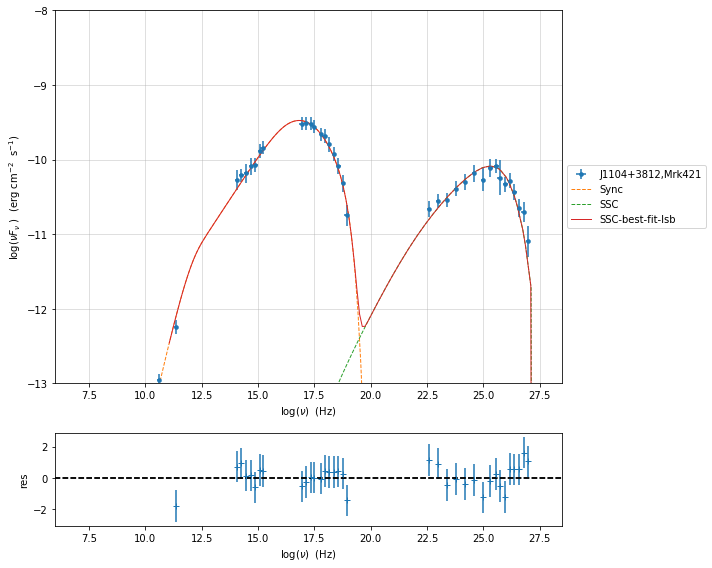

In [51]:
%matplotlib inline
fit_model_lsb.set_nu_grid(1E6,1E30,200)
fit_model_lsb.eval()
p2=fit_model_lsb.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

### Model fitting with Minuit

In [52]:
jet_minuit=Jet.load_model('prefit_jet.dat')
jet_minuit.set_gamma_grid_size(200)

fit_model_minuit=FitModel( jet=jet_minuit, name='SSC-best-fit-minuit',template=None) 
fit_model_minuit.freeze('z_cosm')
fit_model_minuit.freeze('R_H')
fit_model_minuit.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_minuit.parameters.beam_obj.fit_range=[5,50]

model_minimizer_minuit,best_fit_minuit=fit_SED(fit_model_minuit,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-minuit',minimizer='minuit',max_ev=None)

      name             par type           units               val           phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ---------------------- ---------------- ------------------ ----- ------
               R         region_size              cm 1.7128239342442284e+16              0.0              1e+30 False  False
             R_H     region_position              cm                  1e+17              0.0               None False   True
               B      magnetic_field               G                    0.1              0.0               None False  False
        beam_obj             beaming Lorentz-factor*                   25.0           0.0001               None False  False
          z_cosm            redshift                                 0.0308              0.0               None False  False
               N    electron_density         1 / cm3       2.83092128807034              0.0               None False  False


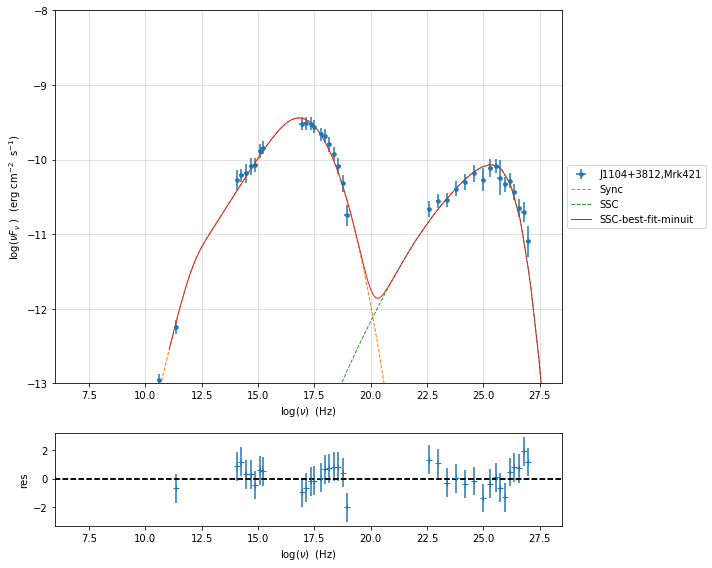

In [54]:
%matplotlib inline
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=fit_model_minuit.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

In [55]:
model_minimizer_minuit.minimizer.mesg

------------------------------------------------------------------
| FCN = 24.64                   |     Ncalls=633 (644 total)     |
| EDM = 4.24E+03 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | par_0 |  1.55E16  |  0.11E16  |            |            |3.16228e+15|3.16228e+17|       |
| 1 | par_1 |   0.070   |   0.009   |            |            |    0    |         |       |
| 2 | par_2 |   29.1    |    0.5    |            |            |    5    |   50    |       |
| 3 | par_3 |   1.94    |   0.14    |            |            |    0    |         |       |
| 4 | par_4 |   332.6   |    1.1    |            |            |    1    |  1e+09  |       |
| 5 | par_5 |  0.980E9  |  0.013E9  |            |            |    1    |  1e+15  |       |
| 6 | par_6 |   2.04    |   0.04    |            |            |   -10   |   10    |       |
| 7 | par_7 |   1.18    |   0.13    |            |            |   -15   |   15    |       |
| 8 | par_8 |  0.388E5  |  0.025E5  |            |            |    1    |  1e+09  |       |
-------------------------------------------------------------------------------------------

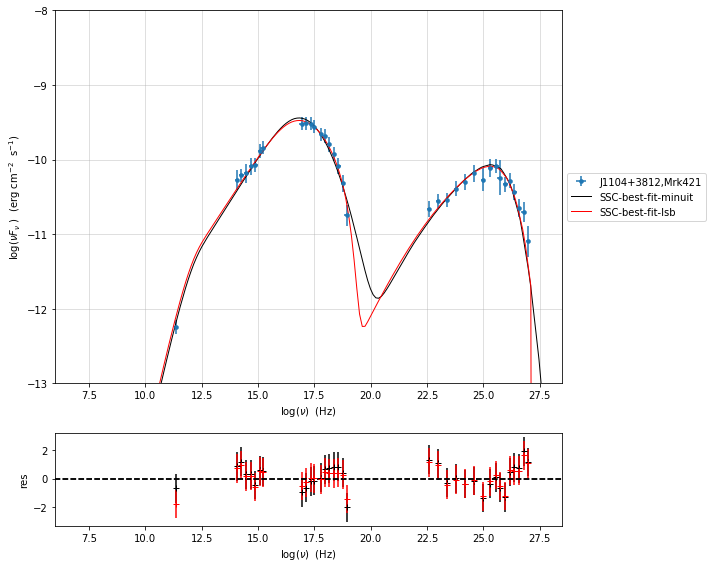

In [56]:
%matplotlib inline
from jetset.plot_sedfit import PlotSED
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=PlotSED()
p2.add_data_plot(sed_data,fit_range=[ 11,29])
p2.add_model_plot(fit_model_minuit,color='black')
p2.add_residual_plot(fit_model_minuit,sed_data,fit_range=[ 11,29],color='black')
p2.add_model_plot(fit_model_lsb,color='red')
p2.add_residual_plot(fit_model_lsb,sed_data,fit_range=[ 11,29],color='red')
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

## MCMC sampling

In [58]:
from jetset.mcmc import McmcSampler


In [ ]:
jet_lsb.set_gamma_grid_size(100)
mcmc=McmcSampler(model_minimizer_lsb)
mcmc.run_sampler(nwalkers=150,burnin=10,threads=1,steps=50)

\ progress=49.067% calls=3680 accepted=3448

In [68]:
f=mcmc.corner_plot()

AssertionError: I don't believe that you want more dimensions than samples!

In [22]:
mcmc.sampler_out.get_par('N')

(array([3.00817962, 3.00817962, 3.00817962, ..., 5.2586507 , 6.96212386,
        6.96212386]), 3)

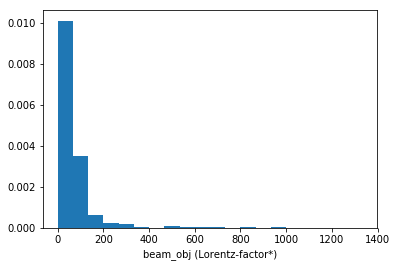

In [23]:
f=mcmc.sampler_out.plot_par('beam_obj')

In [24]:
mcmc.seve_run('test_run')

In [25]:
from jetset.mcmc import SamplerOutput
s=SamplerOutput.from_file('test_run')

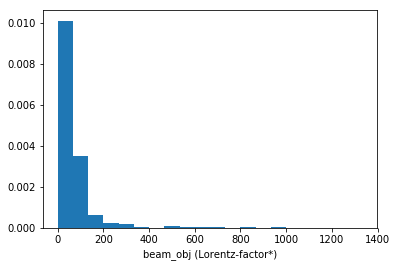

In [26]:
f=s.plot_par('beam_obj',log_plot=False)


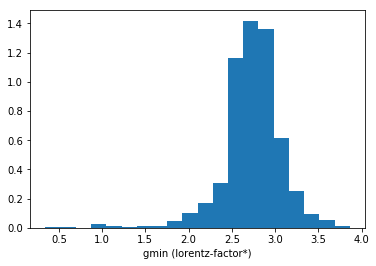

In [27]:
f=s.plot_par('gmin',log_plot=True)


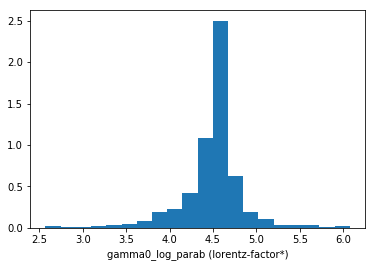

In [28]:
f=s.plot_par('gamma0_log_parab',log_plot=True)


In [30]:
jet_minuit.set_gamma_grid_size(100)
mcmc=McmcSampler(model_minimizer_minuit)
mcmc.run_sampler(nwalkers=150,burnin=10,threads=1,steps=50)

\ progress=102.000% calls=7650 accepted=6414

In [ ]:
f=mcmc.corner_plot()

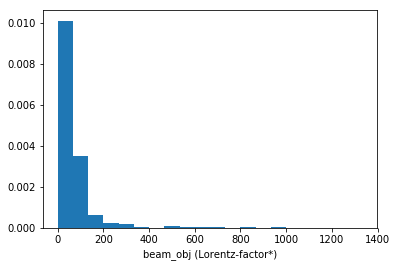

In [34]:
f=s.plot_par('beam_obj',log_plot=False)
